In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


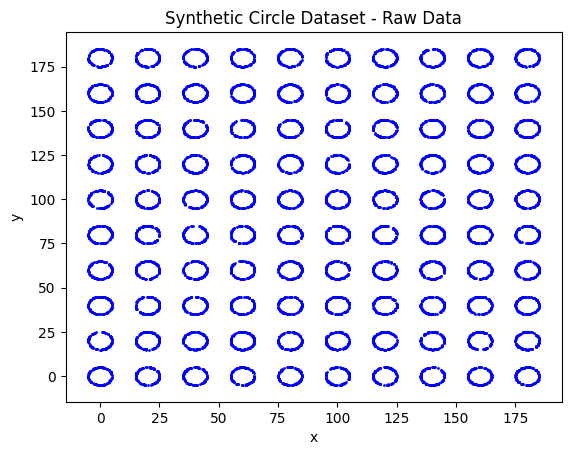

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv("/content/drive/MyDrive/Circles.csv")

# Extract the points
X = data[['x', 'y']].values

# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], s=1, color='blue')
plt.title("Synthetic Circle Dataset - Raw Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

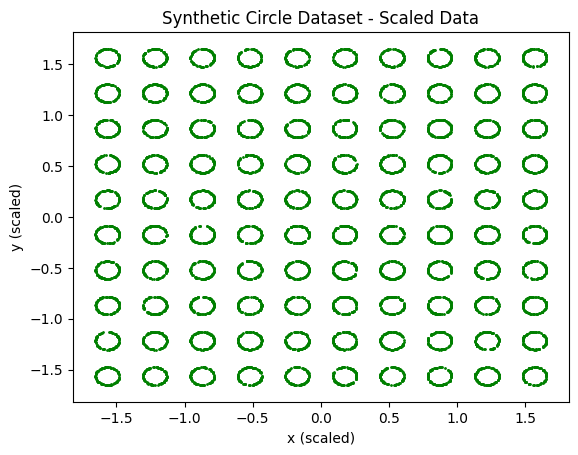

In [ ]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the scaled data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=1, color='green')
plt.title("Synthetic Circle Dataset - Scaled Data")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

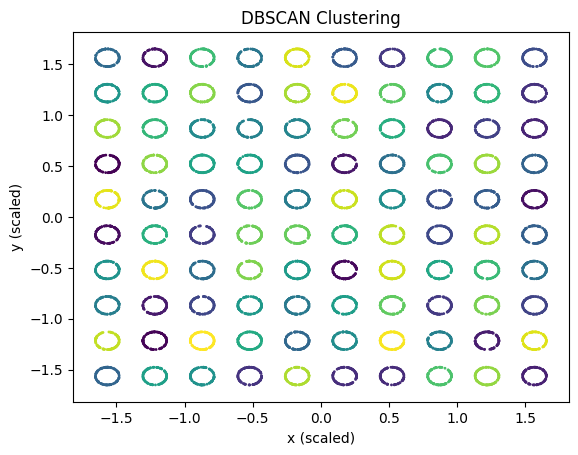

In [ ]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=1)
plt.title("DBSCAN Clustering")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


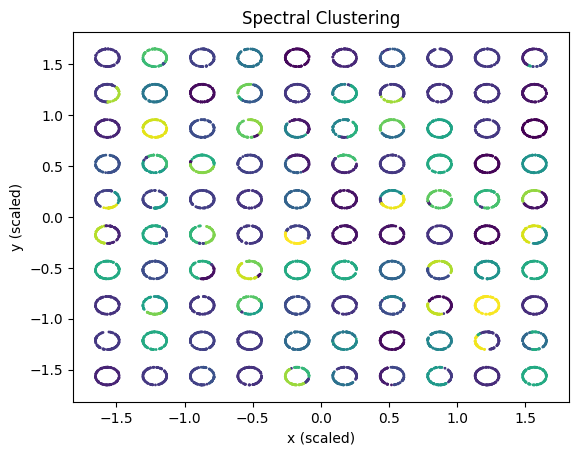

In [ ]:
# Import Spectral Clustering
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=100, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# Visualize Spectral Clustering Results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis', s=1)
plt.title("Spectral Clustering")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

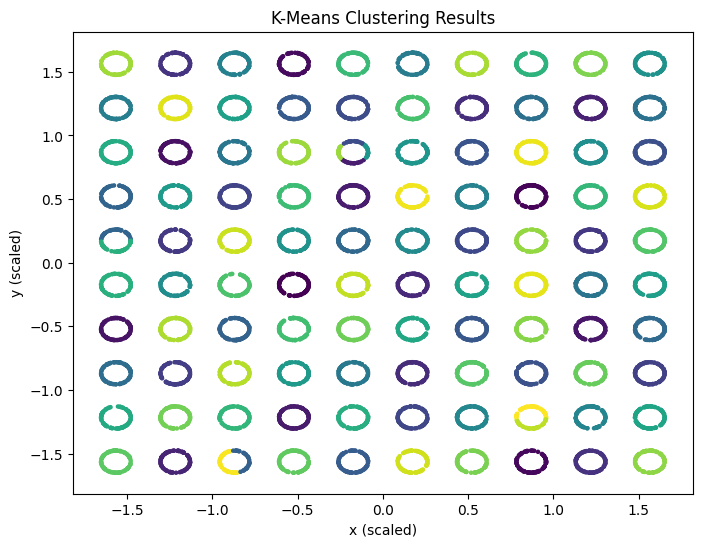


--- K-Means Clustering Evaluation ---
Silhouette Score: 0.590
Calinski-Harabasz Index: 23593.209


In [ ]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Preprocess data (standardize the dataset)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply K-Means Clustering
kmeans = KMeans(n_clusters=100, random_state=42)  # Set number of clusters to 100 (as per the dataset)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 2: Visualize the K-Means Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.title("K-Means Clustering Results")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

# Step 3: Evaluate K-Means Clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Silhouette Score: Measures how similar points are within a cluster and how distinct they are from other clusters
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# Calinski-Harabasz Index: Measures cluster density and separation
ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)

# Print evaluation results
print("\n--- K-Means Clustering Evaluation ---")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.3f}")

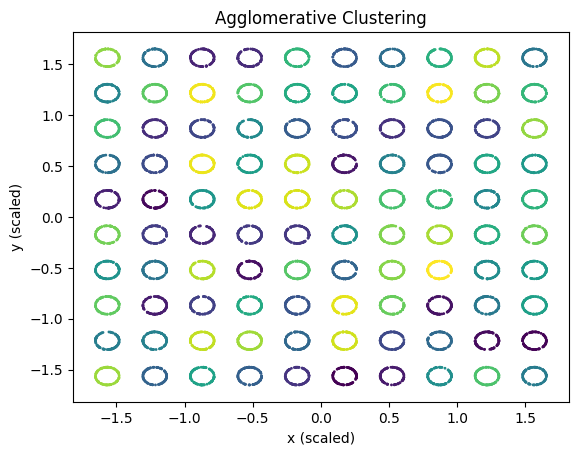

In [ ]:
# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=100, linkage='single')
agglomerative_labels = agglomerative.fit_predict(X_scaled)

# Visualize Agglomerative Clustering Results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels, cmap='viridis', s=1)
plt.title("Agglomerative Clustering")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

In [ ]:
# Import evaluation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
dbscan_ch_score = calinski_harabasz_score(X_scaled, dbscan_labels[dbscan_labels != -1]) if -1 in dbscan_labels else calinski_harabasz_score(X_scaled, dbscan_labels)

# Evaluate Spectral Clustering
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
spectral_ch_score = calinski_harabasz_score(X_scaled, spectral_labels)

# Evaluate Agglomerative Clustering
agglomerative_silhouette = silhouette_score(X_scaled, agglomerative_labels)
agglomerative_ch_score = calinski_harabasz_score(X_scaled, agglomerative_labels)

# Print results
print("\n--- Clustering Performance Comparison ---")
print(f"DBSCAN - Silhouette: {dbscan_silhouette:.3f}, CH Index: {dbscan_ch_score:.3f}")
print(f"Spectral Clustering - Silhouette: {spectral_silhouette:.3f}, CH Index: {spectral_ch_score:.3f}")
print(f"Agglomerative Clustering - Silhouette: {agglomerative_silhouette:.3f}, CH Index: {agglomerative_ch_score:.3f}")


--- Clustering Performance Comparison ---
DBSCAN - Silhouette: 0.609, CH Index: 26596.679
Spectral Clustering - Silhouette: -0.176, CH Index: 122.114
Agglomerative Clustering - Silhouette: 0.609, CH Index: 26596.679


**ENSEMBLE MODELS**

In [ ]:
from collections import Counter

# Assign weights based on Silhouette Score
weights = {
    "DBSCAN": dbscan_silhouette,
    "K-Means": kmeans_silhouette,
    "Agglomerative": agglomerative_silhouette
}

n_samples = X_scaled.shape[0]
# Voting-based Weighted Ensemble
weighted_ensemble_labels = np.zeros(n_samples)

for i in range(n_samples):
    # Gather predictions
    labels = {
        "DBSCAN": dbscan_labels[i],
        "K-Means": kmeans_labels[i],
        "Agglomerative": agglomerative_labels[i],
    }
    # Weighted voting
    weighted_votes = Counter()
    for model, label in labels.items():
        weighted_votes[label] += weights[model]
    # Assign the label with the highest weighted vote
    weighted_ensemble_labels[i] = max(weighted_votes, key=weighted_votes.get)
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def evaluate_clustering(labels, data):

    silhouette = silhouette_score(data, labels)
    ch_index = calinski_harabasz_score(data, labels)
    return silhouette, ch_index

# Evaluate the Weighted Voting-based Ensemble
ensemble_silhouette, ensemble_ch = evaluate_clustering(weighted_ensemble_labels, X_scaled)

# Print Results
print("\n--- Weighted Voting Ensemble Clustering Evaluation ---")
print(f"Silhouette Score: {ensemble_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {ensemble_ch:.3f}")


--- Weighted Voting Ensemble Clustering Evaluation ---
Silhouette Score: 0.587
Calinski-Harabasz Index: 14901.114


<ipython-input-23-b748c4d0aa17>:37: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - co_association, method='average')  # Dissimilarity = 1 - similarity


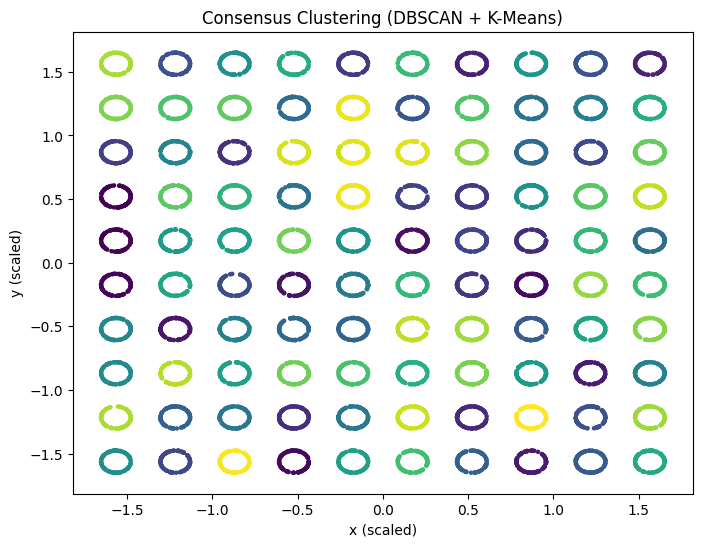

In [ ]:

# Import required libraries
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

# Preprocess data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Run DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 2: Run K-Means
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 3: Build Co-Association Matrix
n_samples = X_scaled.shape[0]
co_association = np.zeros((n_samples, n_samples))

# Combine cluster labels from DBSCAN and K-Means
labels_list = [dbscan_labels, kmeans_labels]

for labels in labels_list:
    for i in range(n_samples):
        for j in range(n_samples):
            co_association[i, j] += (labels[i] == labels[j])

# Normalize the co-association matrix
co_association /= len(labels_list)

# Step 4: Perform Consensus Clustering
# Use hierarchical clustering on the co-association matrix
linkage_matrix = linkage(1 - co_association, method='average')  # Dissimilarity = 1 - similarity
consensus_labels = fcluster(linkage_matrix, t=100, criterion='maxclust')

# Step 5: Visualize the Consensus Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=consensus_labels, cmap='viridis', s=5)
plt.title("Consensus Clustering (DBSCAN + K-Means)")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Evaluate Consensus Clustering
consensus_silhouette = silhouette_score(X_scaled, consensus_labels)
consensus_ch_score = calinski_harabasz_score(X_scaled, consensus_labels)

print("\n--- Consensus Clustering Evaluation ---")
print(f"Consensus Clustering Silhouette Score: {consensus_silhouette:.3f}")
print(f"Consensus Clustering Calinski-Harabasz Index: {consensus_ch_score:.3f}")


--- Consensus Clustering Evaluation ---
Consensus Clustering Silhouette Score: 0.594
Consensus Clustering Calinski-Harabasz Index: 24209.123


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Comparative Analysis Results:
       Algorithm  Silhouette Score  Calinski-Harabasz Index
0         DBSCAN          0.608503             26596.678878
1         KMeans          0.590123             23593.208650
2  Agglomerative          0.608503             26596.678878
3       Spectral         -0.079912               125.892291


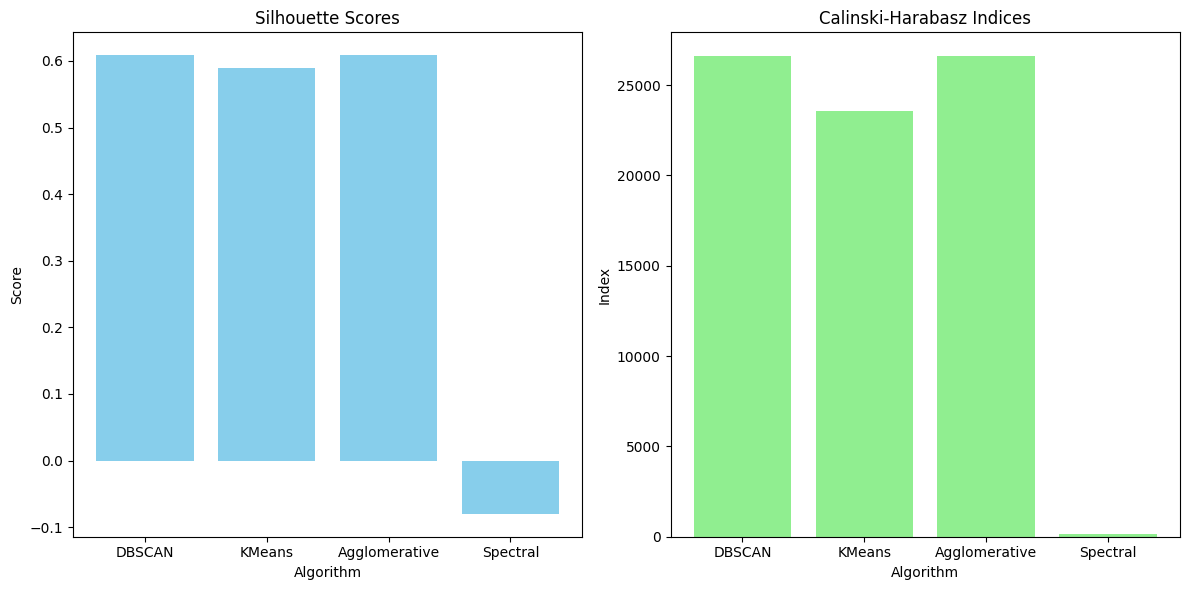

In [ ]:

X = data[['x', 'y']].values

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define clustering algorithms and their parameters
clustering_algorithms = {
    "DBSCAN": DBSCAN(eps=0.1, min_samples=10),
    "KMeans": KMeans(n_clusters=100, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=100, linkage='single'),
    "Spectral": SpectralClustering(n_clusters=100, affinity='nearest_neighbors', random_state=42)
}

# Store results for comparison
results = []

# Perform clustering and evaluate each algorithm
for name, algorithm in clustering_algorithms.items():
    # Fit the model and predict cluster labels
    labels = algorithm.fit_predict(X_scaled)

    # Evaluate the clustering (handle outliers for silhouette score in DBSCAN)
    if name == "DBSCAN" and -1 in labels:
        labels_eval = labels[labels != -1]  # Exclude noise points
        X_eval = X_scaled[labels != -1]
    else:
        labels_eval = labels
        X_eval = X_scaled

    # Compute metrics
    silhouette = silhouette_score(X_eval, labels_eval) if len(np.unique(labels_eval)) > 1 else np.nan
    ch_index = calinski_harabasz_score(X_eval, labels_eval) if len(np.unique(labels_eval)) > 1 else np.nan

    # Append results
    results.append({"Algorithm": name, "Silhouette Score": silhouette, "Calinski-Harabasz Index": ch_index})

# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results)

# Print results
print("\nComparative Analysis Results:")
print(results_df)

# Visualization of the results
plt.figure(figsize=(12, 6))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.bar(results_df['Algorithm'], results_df['Silhouette Score'], color='skyblue')
plt.title("Silhouette Scores")
plt.ylabel("Score")
plt.xlabel("Algorithm")

# Calinski-Harabasz Index Plot
plt.subplot(1, 2, 2)
plt.bar(results_df['Algorithm'], results_df['Calinski-Harabasz Index'], color='lightgreen')
plt.title("Calinski-Harabasz Indices")
plt.ylabel("Index")
plt.xlabel("Algorithm")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mode

# Voting-based Ensemble with Safe Mode Handling
ensemble_labels = np.zeros(n_samples)

# Iterate through each data point and perform majority voting
for i in range(n_samples):
    labels = [dbscan_labels[i], kmeans_labels[i], agglomerative_labels[i]]

    # Ensure safe access to the mode result
    most_common_label = mode(labels, keepdims=True).mode[0]  # 'keepdims=True' ensures an array is always returned
    ensemble_labels[i] = most_common_label


In [ ]:
# Voting-based Ensemble with Corrected Mode Handling
n_samples = X_scaled.shape[0]
ensemble_labels = np.zeros(n_samples)

for i in range(n_samples):
    labels = [dbscan_labels[i], kmeans_labels[i], agglo_labels[i]]
    most_common_label = mode(labels, keepdims=True).mode[0]  # Ensure proper indexing
    ensemble_labels[i] = most_common_label

# Evaluate the Voting-based Ensemble Clustering
ensemble_silhouette, ensemble_ch = evaluate_clustering(ensemble_labels, X_scaled)

# Display Results
print("\n--- Clustering Model Comparison ---")
print(f"DBSCAN: Silhouette = {dbscan_silhouette:.3f}, CH Index = {dbscan_ch:.3f}")
print(f"K-Means: Silhouette = {kmeans_silhouette:.3f}, CH Index = {kmeans_ch:.3f}")
print(f"Agglomerative Clustering: Silhouette = {agglo_silhouette:.3f}, CH Index = {agglo_ch:.3f}")
print(f"Voting Ensemble: Silhouette = {ensemble_silhouette:.3f}, CH Index = {ensemble_ch:.3f}")



--- Clustering Model Comparison ---
DBSCAN: Silhouette = 0.609, CH Index = 26596.679
K-Means: Silhouette = 0.590, CH Index = 23593.209
Agglomerative Clustering: Silhouette = 0.609, CH Index = 26596.679
Voting Ensemble: Silhouette = -0.267, CH Index = 149.776


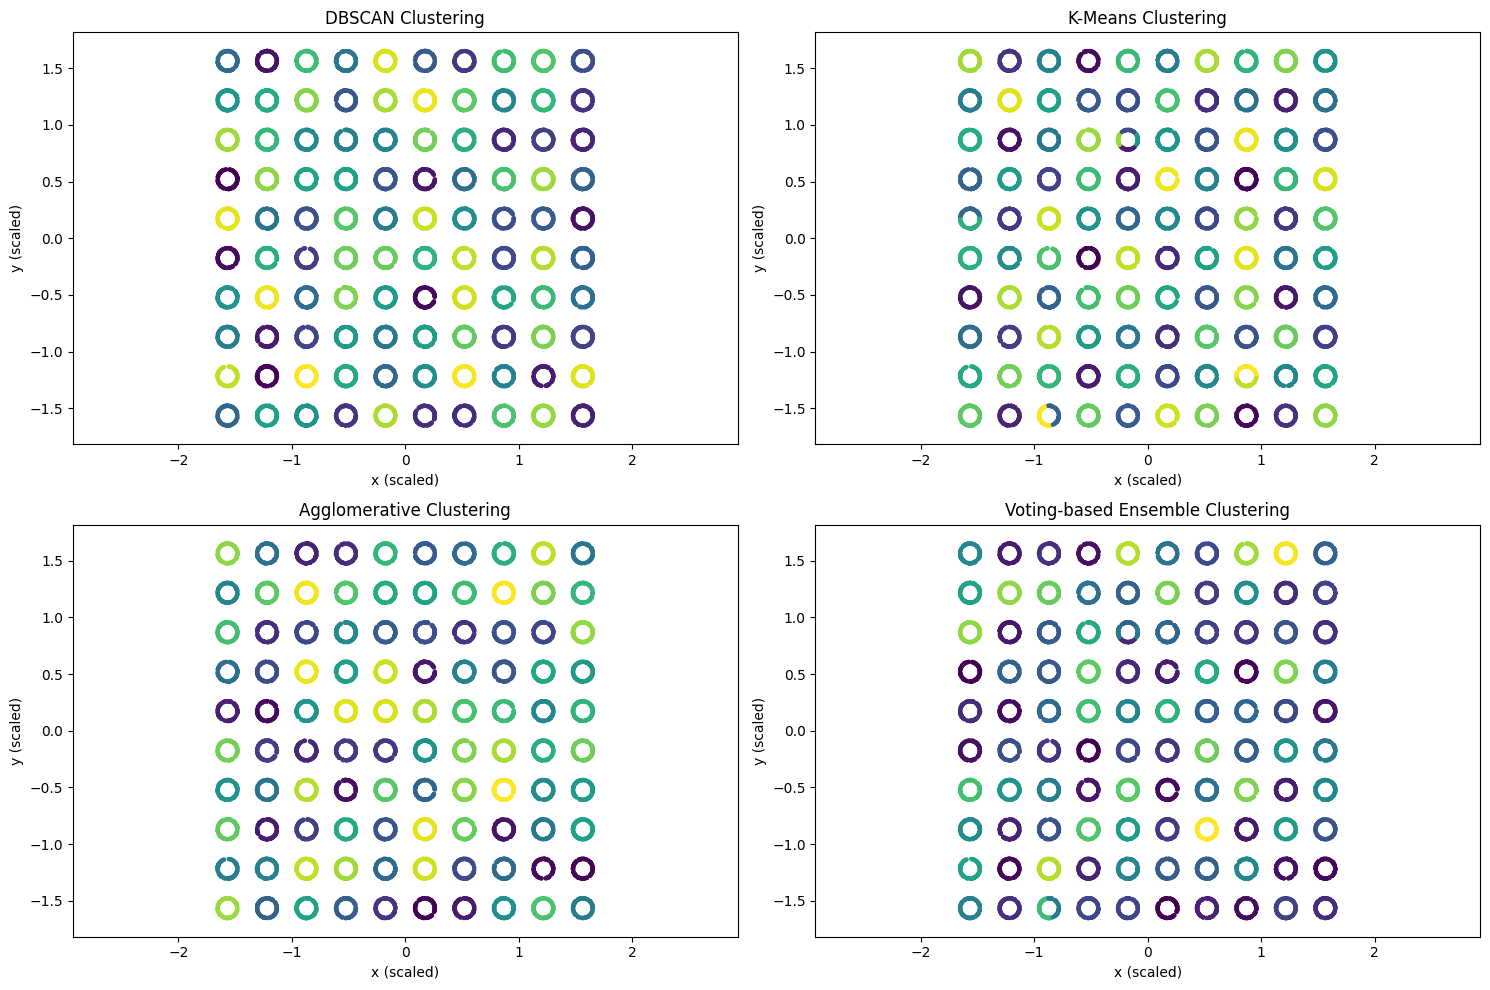

In [ ]:
# Function to plot clustering results
def plot_clustering_results(X, labels_list, titles, figsize=(15, 10)):
    """
    Plots clustering results for multiple clustering methods side by side.

    Parameters:
        X (ndarray): The input data points.
        labels_list (list of ndarray): List of cluster label arrays from different clustering methods.
        titles (list of str): Titles for the subplots.
        figsize (tuple): Size of the entire figure.
    """
    n_plots = len(labels_list)
    plt.figure(figsize=figsize)

    for i, (labels, title) in enumerate(zip(labels_list, titles)):
        plt.subplot(2, (n_plots + 1) // 2, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
        plt.title(title)
        plt.xlabel("x (scaled)")
        plt.ylabel("y (scaled)")
        plt.axis("equal")

    plt.tight_layout()
    plt.show()

# Titles for the clustering methods
titles = [
    "DBSCAN Clustering",
    "K-Means Clustering",
    "Agglomerative Clustering",
    "Voting-based Ensemble Clustering",
]

# List of clustering labels
labels_list = [
    dbscan_labels,
    kmeans_labels,
    agglo_labels,
    ensemble_labels,
]

# Plot all clustering results
plot_clustering_results(X_scaled, labels_list, titles)

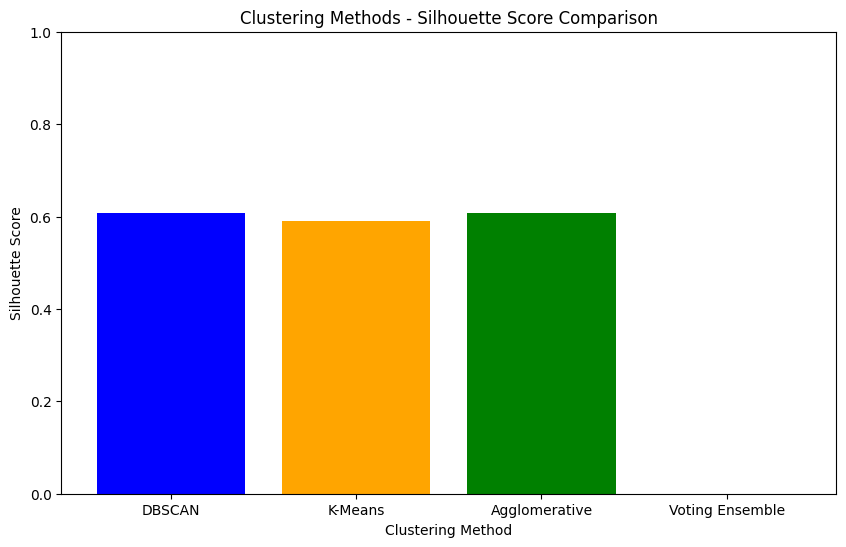

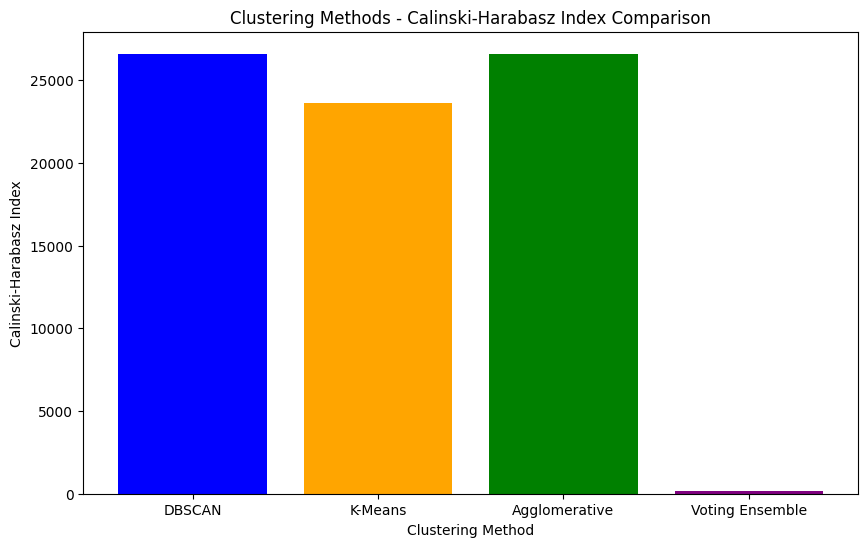


--- Clustering Methods Comparison ---
            Method  Silhouette Score  Calinski-Harabasz Index
0           DBSCAN          0.608503             26596.678878
1          K-Means          0.590123             23593.208650
2    Agglomerative          0.608503             26596.678878
3  Voting Ensemble         -0.267375               149.776309


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for comparison
methods = ["DBSCAN", "K-Means", "Agglomerative", "Voting Ensemble"]
silhouette_scores = [dbscan_silhouette, kmeans_silhouette, agglomerative_silhouette, ensemble_silhouette]
ch_indices = [dbscan_ch_score, kmeans_ch_score, agglomerative_ch_score, ensemble_ch_score]

# Create a DataFrame for easy manipulation and visualization
comparison_df = pd.DataFrame({
    "Method": methods,
    "Silhouette Score": silhouette_scores,
    "Calinski-Harabasz Index": ch_indices
})

# Plot Silhouette Score comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Method"], comparison_df["Silhouette Score"], color=['blue', 'orange', 'green', 'purple'])
plt.title("Clustering Methods - Silhouette Score Comparison")
plt.ylabel("Silhouette Score")
plt.xlabel("Clustering Method")
plt.ylim(0, 1)  # Silhouette Score range
plt.show()

# Plot Calinski-Harabasz Index comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Method"], comparison_df["Calinski-Harabasz Index"], color=['blue', 'orange', 'green', 'purple'])
plt.title("Clustering Methods - Calinski-Harabasz Index Comparison")
plt.ylabel("Calinski-Harabasz Index")
plt.xlabel("Clustering Method")
plt.show()

# Print the comparison table for reference
print("\n--- Clustering Methods Comparison ---")
print(comparison_df)

In [ ]:
from collections import Counter

# Assign weights based on Silhouette Score
weights = {
    "DBSCAN": dbscan_silhouette,
    "K-Means": kmeans_silhouette,
    "Agglomerative": agglomerative_silhouette
}

# Voting-based Weighted Ensemble
weighted_ensemble_labels = np.zeros(n_samples)

for i in range(n_samples):
    # Gather predictions
    labels = {
        "DBSCAN": dbscan_labels[i],
        "K-Means": kmeans_labels[i],
        "Agglomerative": agglomerative_labels[i],
    }
    # Weighted voting
    weighted_votes = Counter()
    for model, label in labels.items():
        weighted_votes[label] += weights[model]
    # Assign the label with the highest weighted vote
    weighted_ensemble_labels[i] = max(weighted_votes, key=weighted_votes.get)

# Evaluate the Weighted Voting-based Ensemble
ensemble_silhouette, ensemble_ch = evaluate_clustering(weighted_ensemble_labels, X_scaled)

# Print Results
print("\n--- Weighted Voting Ensemble Clustering Evaluation ---")
print(f"Silhouette Score: {ensemble_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {ensemble_ch:.3f}")


--- Weighted Voting Ensemble Clustering Evaluation ---
Silhouette Score: 0.587
Calinski-Harabasz Index: 14901.114


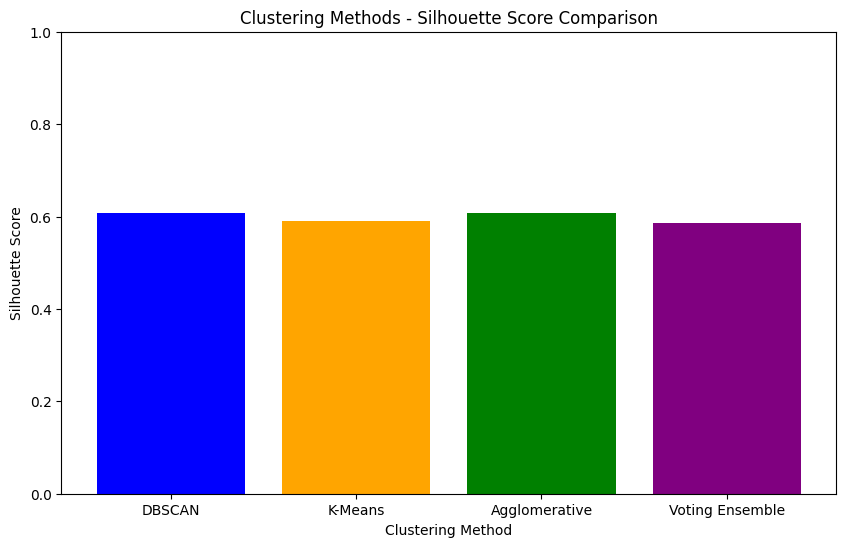

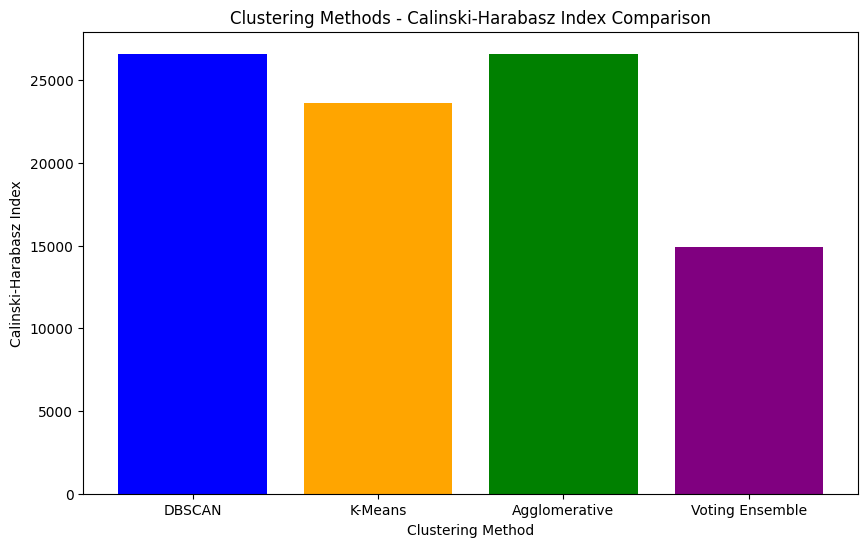


--- Clustering Methods Comparison ---
            Method  Silhouette Score  Calinski-Harabasz Index
0           DBSCAN          0.608503             26596.678878
1          K-Means          0.590123             23593.208650
2    Agglomerative          0.608503             26596.678878
3  Voting Ensemble          0.586930             14901.113973


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for comparison
methods = ["DBSCAN", "K-Means", "Agglomerative", "Voting Ensemble"]
silhouette_scores = [dbscan_silhouette, kmeans_silhouette, agglomerative_silhouette, ensemble_silhouette]
ch_indices = [dbscan_ch_score, kmeans_ch_score, agglomerative_ch_score, ensemble_ch_score]

# Create a DataFrame for easy manipulation and visualization
comparison_df = pd.DataFrame({
    "Method": methods,
    "Silhouette Score": silhouette_scores,
    "Calinski-Harabasz Index": ch_indices
})

# Plot Silhouette Score comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Method"], comparison_df["Silhouette Score"], color=['blue', 'orange', 'green', 'purple'])
plt.title("Clustering Methods - Silhouette Score Comparison")
plt.ylabel("Silhouette Score")
plt.xlabel("Clustering Method")
plt.ylim(0, 1)  # Silhouette Score range
plt.show()

# Plot Calinski-Harabasz Index comparison
plt.figure(figsize=(10, 6))
plt.bar(comparison_df["Method"], comparison_df["Calinski-Harabasz Index"], color=['blue', 'orange', 'green', 'purple'])
plt.title("Clustering Methods - Calinski-Harabasz Index Comparison")
plt.ylabel("Calinski-Harabasz Index")
plt.xlabel("Clustering Method")
plt.show()

# Print the comparison table for reference
print("\n--- Clustering Methods Comparison ---")
print(comparison_df)